##Latar Belakang Masalah

Dilansir dari website Badan Pusat Statistik (BPS), Indikator keberhasilan suatu negara dalam proses pembangunan manusia dapat dilihat melalui Indeks Pembangunan Manusia (IPM). IPM diperkenalkan oleh United Nations Development Programme (UNDP) pada tahun 1990 dan dipublikasikan secara berkala dalam laporan tahunan Human Development Report (HDR). IPM menjelaskan bagaimana penduduk dapat mengakses hasil pembangunan dalam memperoleh pendapatan, kesehatan, pendidikan, dan sebagainya. IPM dapat menentukan peringkat atau level pembangunan suatu wilayah/negara. Bagi Indonesia, IPM merupakan data strategis yang bisa digunakan sebagai ukuran kinerja pemerintah. IPM pun menjadi salah satu penentuan dana alokasi umum (DAU).

##Rumusan Masalah



1.   Bagaimana implementasi model Random Forest dan model AdaBoost dalam klasifikasi IPM? 
2.   Bagaimana akurasi yang didapatkan ketika menggunakan berbagai metode data balancing  pada model Random Forest dan model AdaBoost?
3.   Model mana yang menghasilkan nilai akurasi terbaik?



##Import Library dan Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')

##Data Acquisition

In [ ]:
#dataset IPM (Indeks Pembangunan Manusia)
data = pd.read_csv('/content/IPM.csv')

In [ ]:
#Menampilkan 5 baris teratas dari dataset
data.head(2)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal


In [ ]:
#Menampilkan 5 baris terakhir dari dataset
data.tail(2)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


In [ ]:
#Menampilkan ukuran dimensi dari dataset
data.shape

(2196, 5)

In [ ]:
#Mengetahui adanya data yang duplikat
data.duplicated().sum()

0

In [ ]:
#Mengetahui data yang bernilai kosong
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [ ]:
#Mengetahui informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
data.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

##Data Exploration & Visualisasi

In [ ]:
print(set(data['IPM']))

{'High', 'Low', 'Very-High', 'Normal'}


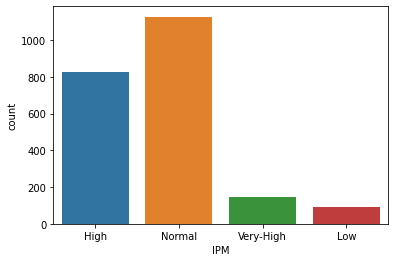

In [ ]:
sns.countplot(data=data, x='IPM')
plt.show()

Berdasarkan hasil visualisasi, IPM dengan kategori Normal memiliki frekuensi tertinggi


In [ ]:
data['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

In [ ]:
data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


##Normalisasi Data


In [ ]:
scaler = RobustScaler()
scaler.fit(data.iloc[:,:-1])
data_scaler = scaler.transform(data.iloc[:,:-1])
data_scaler = pd.DataFrame(data_scaler, columns=data.iloc[:,:-1].columns)
data_scaler.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,1.229508,-0.202068,0.664804,0.038867
1,0.852459,-0.991452,0.726257,-1.000555
2,1.196721,-0.461288,0.279330,-0.523043
3,1.426230,-0.655377,0.391061,-1.196002
4,0.942623,-0.704225,0.832402,-0.347585


##Encoding

In [ ]:
encoding = OrdinalEncoder()
data['IPM'] = encoding.fit_transform(data[['IPM']])



*   Very-High : 1.0
*   High : 0.0
*   Normal : 2.0
*   Low : 3.0






In [ ]:
data_scaler.insert(4, 'IPM', data['IPM'])
data_scaler.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,1.229508,-0.202068,0.664804,0.038867,0.0
1,0.852459,-0.991452,0.726257,-1.000555,2.0
2,1.196721,-0.461288,0.279330,-0.523043,2.0
3,1.426230,-0.655377,0.391061,-1.196002,2.0
4,0.942623,-0.704225,0.832402,-0.347585,2.0


In [ ]:
#Menghapus variabel IPM dari dataset yang masuk sebagai variabel X dan inisialisasi variabel stroke sebagai variabel y
X = data.drop(['IPM'],axis = 1)
y = data['IPM']

In [ ]:
#Membagi dataset menjadi data training dan testing dengan rasio 30% data digunakan sebagai data testing. Dengan pemilihan random data sebesar 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((1537, 4), (659, 4))

##Random Forest Model

In [ ]:
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
#n_estimator : banyaknya pohon decision tree
#nilai default random dorest menggunakan gini
classifier_rf = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf.predict(X_test)

Evaluation

In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[249   0   7   4]
 [  0  27   1   0]
 [ 12   0 314   0]
 [  1   0   0  44]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       260
         1.0       1.00      0.96      0.98        28
         2.0       0.98      0.96      0.97       326
         3.0       0.92      0.98      0.95        45

    accuracy                           0.96       659
   macro avg       0.96      0.97      0.96       659
weighted avg       0.96      0.96      0.96       659



In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9986987638256344
Testing-set accuracy score: 0.9620637329286799


##AdaBoost Model

In [ ]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

Evaluasi

In [ ]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred_AB = classifier_rf.predict(X_test)

In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[249,   0,   7,   4],
       [  0,  27,   1,   0],
       [ 12,   0, 314,   0],
       [  1,   0,   0,  44]])

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', ABclassifier.score(X_test, y_test))

Training-set accuracy score: 0.7553675992192583
Testing-set accuracy score: 0.7359635811836115


##Balancing Data

Class Imbalance adalah situasi yang terjadi ketika salah satu class memiliki jumlah lebih besar dari pada class lainnya, dalam kasus ini class Normal memiliki frekuensi tertinggi, dibandingkan dengan class yg lainnya

Paradoks akurasi adalah kondisi dimana akurasi bukanlah metrik yang baik untuk model prediktif ketika mengklasifikasikan class imbalance.

Salah satu cara penanganannya menggunakan balancing data pada data train. Balancing data bertujuan untuk membuat proporsi kelas mayoritas dan minoritas menjadi seimbang.

Teknik yang saya gunakan dalam rangka menangani ketidak seimbangan kelas pada kasus ini adalah SMOTE (Synthetic Minority Over-sampling Technique), Oversampling, dan Undersampling yang akan diterapkan pada Random Forest Model dan AdaBoost Model

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)


##Balancing Data Oversampling

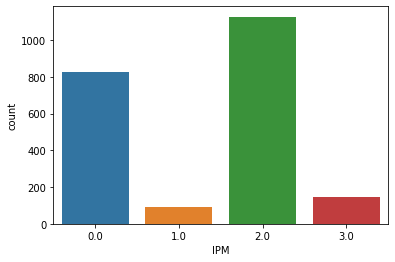

In [ ]:
sns.countplot(data=data, x='IPM')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 42)
X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)

In [ ]:
x = data.drop(['IPM'], axis=1)
y = data['IPM']

In [ ]:
X_train_ROS.shape

(3208, 4)

<Axes: xlabel='IPM', ylabel='count'>

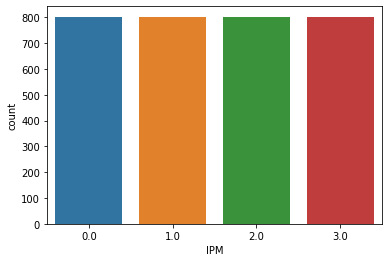

In [ ]:
sns.countplot(data=data, x= y_train_ROS)

##Balancing Data Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(random_state = 42)
X_train_RUS, y_train_RUS = RUS.fit_resample(X_train, y_train)

In [ ]:
x = data.drop(['IPM'], axis=1)
y = data['IPM']

In [ ]:
X_train_ROS.shape

(3208, 4)

<Axes: xlabel='IPM', ylabel='count'>

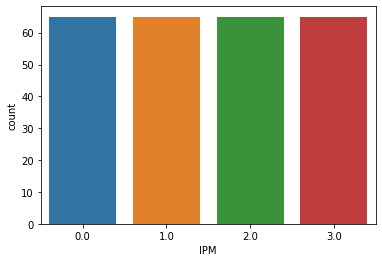

In [ ]:
sns.countplot(data=data, x= y_train_RUS)

##Random Forest (Dengan SMOTE)

In [ ]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf_SMOTE = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred_SMOTE = classifier_rf_SMOTE.predict(X_test)

In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[249   0   7   4]
 [  0  27   1   0]
 [ 12   0 314   0]
 [  1   0   0  44]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       260
         1.0       1.00      0.96      0.98        28
         2.0       0.98      0.96      0.97       326
         3.0       0.92      0.98      0.95        45

    accuracy                           0.96       659
   macro avg       0.96      0.97      0.96       659
weighted avg       0.96      0.96      0.96       659



In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf_SMOTE.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', classifier_rf_SMOTE.score(X_test, y_test))

Training-set accuracy score: 0.9990648379052369
Testing-set accuracy score: 0.9802731411229135


##Random Forest (Dengan Balancing Data Oversampling)



In [ ]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf_ROS = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf_ROS.fit(X_train_ROS, y_train_ROS)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred_ROS = classifier_rf_ROS.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       260
         1.0       1.00      0.96      0.98        28
         2.0       0.98      0.96      0.97       326
         3.0       0.92      0.98      0.95        45

    accuracy                           0.96       659
   macro avg       0.96      0.97      0.96       659
weighted avg       0.96      0.96      0.96       659



In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[249,   0,   7,   4],
       [  0,  27,   1,   0],
       [ 12,   0, 314,   0],
       [  1,   0,   0,  44]])

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf_ROS.score(X_train_ROS, y_train_ROS))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', classifier_rf_ROS.score(X_test, y_test))

Training-set accuracy score: 0.9990648379052369
Testing-set accuracy score: 0.9681335356600911


##Random Forest (Dengan Balancing Data Undersampling)

In [ ]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf_RUS = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf_RUS.fit(X_train_RUS, y_train_RUS)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred_RUS = classifier_rf_RUS.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       260
         1.0       0.78      1.00      0.88        28
         2.0       0.93      0.87      0.90       326
         3.0       0.78      1.00      0.87        45

    accuracy                           0.89       659
   macro avg       0.84      0.94      0.88       659
weighted avg       0.89      0.89      0.89       659



In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[227,   0,  20,  13],
       [  0,  28,   0,   0],
       [ 33,   8, 285,   0],
       [  0,   0,   0,  45]])

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf_RUS.score(X_train_RUS, y_train_RUS))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', classifier_rf_RUS.score(X_test, y_test))

Training-set accuracy score: 0.9923076923076923
Testing-set accuracy score: 0.9195751138088012


## AdaBoost Model (Dengan SMOTE)

In [ ]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier_SMOTE = AdaBoostClassifier(n_estimators=100)

ABclassifier_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier_SMOTE.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

         0.0       0.86      0.07      0.13       260
         1.0       1.00      0.71      0.83        28
         2.0       0.58      1.00      0.74       326
         3.0       0.72      0.93      0.82        45

    accuracy                           0.62       659
   macro avg       0.79      0.68      0.63       659
weighted avg       0.72      0.62      0.51       659



In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB)
cm

array([[ 18,   0, 226,  16],
       [  0,  20,   8,   0],
       [  0,   0, 326,   0],
       [  3,   0,   0,  42]])

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier_SMOTE.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', ABclassifier_SMOTE.score(X_test, y_test))

Training-set accuracy score: 0.6633416458852868
Testing-set accuracy score: 0.6160849772382397


##AdaBoost Model (Dengan Balancing Data Oversampling)

In [ ]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier_ROS = AdaBoostClassifier(n_estimators=100)

ABclassifier_ROS.fit(X_train_ROS, y_train_ROS)
y_pred_AB_ROS = ABclassifier_ROS.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_AB_ROS))

              precision    recall  f1-score   support

         0.0       0.43      1.00      0.60       260
         1.0       0.88      0.25      0.39        28
         2.0       0.49      0.06      0.11       326
         3.0       0.00      0.00      0.00        45

    accuracy                           0.44       659
   macro avg       0.45      0.33      0.27       659
weighted avg       0.45      0.44      0.31       659



In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB_ROS)
cm

array([[260,   0,   0,   0],
       [  0,   7,  21,   0],
       [305,   1,  20,   0],
       [ 45,   0,   0,   0]])

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier_ROS.score(X_train_ROS, y_train_ROS))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', ABclassifier_ROS.score(X_test, y_test))

Training-set accuracy score: 0.31733167082294267
Testing-set accuracy score: 0.4355083459787557


##AdaBoost Model (Dengan Balancing Data Undersampling)

In [ ]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier_RUS = AdaBoostClassifier(n_estimators=100)

ABclassifier_RUS.fit(X_train_RUS, y_train_RUS)
y_pred_AB_RUS = ABclassifier_RUS.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_AB_RUS))

              precision    recall  f1-score   support

         0.0       0.64      0.14      0.23       260
         1.0       0.05      1.00      0.09        28
         2.0       0.00      0.00      0.00       326
         3.0       0.81      0.56      0.66        45

    accuracy                           0.14       659
   macro avg       0.37      0.42      0.24       659
weighted avg       0.31      0.14      0.14       659



In [ ]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB_RUS)
cm

array([[ 36, 218,   0,   6],
       [  0,  28,   0,   0],
       [  0, 326,   0,   0],
       [ 20,   0,   0,  25]])

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier_RUS.score(X_train_RUS, y_train_RUS))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', ABclassifier_RUS.score(X_test, y_test))

Training-set accuracy score: 0.4461538461538462
Testing-set accuracy score: 0.13505311077389984


##Kesimpulan



*   Setelah membandingkan antara model Random Forest dan model AdaBoost dengan 3 metode data balancing (SMOTE, Oversampling, dan Undersampling), didapatkan nilai akurasi yang paling tinggi sebesar 99,9% pada training-set dan 98,02% pada testing-set yaitu pada model Random Forest dengan metode data balancing SMOTE

*   Metode data balancing SMOTE cenderung memberikan hasil yang lebih baik dibandingkan dengan metode data balancing lainnya

*   Klasifikasi IPM menggunakan model Random Forest menghasilkan akurasi yang sangat baik






